<a href="https://colab.research.google.com/github/rajithareddy-source/Development-of-Interactive-Cyber-Threat-Visualization-Dashboard/blob/main/PYTHON_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cyber_threat_detection_dummy_dataset.csv")
df.head()


,incident_id,timestamp,source_ip,destination_ip,attack_type,severity_level,network_protocol,source_port,destination_port,source_country,packet_count,bytes_transferred,response_time_ms,attack_status,is_malicious
0,INC-1000,30-01-2025 02:25,29.12.140.63,192.168.114.36,Port Scan,Low,HTTPS,6721,443,Brazil,2092,211292,772,Detected,0
1,INC-1001,11-01-2025 14:07,130.13.101.184,192.168.214.57,Brute Force,High,TCP,50753,8080,China,45763,41415515,2792,Mitigated,1
2,INC-1002,08-01-2025 01:49,56.172.52.24,192.168.194.25,Malware,Critical,HTTPS,18359,8080,India,47833,46876340,4397,Blocked,1
3,INC-1003,18-01-2025 05:27,21.150.185.148,192.168.98.181,DDoS,Low,UDP,51687,53,USA,15266,3755436,3118,Mitigated,0
4,INC-1004,21-01-2025 15:14,163.186.83.95,192.168.181.54,Port Scan,Medium,TCP,40944,3306,China,35015,18943115,1343,Successful,0


In [5]:
df.shape


(300, 15)

In [6]:
df.columns


Index(['incident_id', 'timestamp', 'source_ip', 'destination_ip',
       'attack_type', 'severity_level', 'network_protocol', 'source_port',
       'destination_port', 'source_country', 'packet_count',
       'bytes_transferred', 'response_time_ms', 'attack_status',
       'is_malicious'],
      dtype='object')

In [7]:
df.dtypes


,0
incident_id,object
timestamp,object
source_ip,object
destination_ip,object
attack_type,object
severity_level,object
network_protocol,object
source_port,int64
destination_port,int64
source_country,object


In [8]:
df.isnull().sum()


,0
incident_id,0
timestamp,0
source_ip,0
destination_ip,0
attack_type,0
severity_level,0
network_protocol,0
source_port,0
destination_port,0
source_country,0


In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df[['packet_count', 'bytes_transferred', 'response_time_ms']].describe()


,packet_count,bytes_transferred,response_time_ms
count,300.000000,3.000000e+02,300.000000
mean,26167.490000,1.976801e+07,2434.286667
std,14119.222385,1.750185e+07,1419.340972
min,260.000000,2.112920e+05,9.000000
25%,15244.500000,6.103748e+06,1224.750000
50%,25420.500000,1.400542e+07,2397.500000
75%,38450.250000,3.012479e+07,3627.500000
max,49996.000000,7.102478e+07,4962.000000


In [11]:
df['incident_id'].nunique()


300

In [12]:
df['attack_type'].value_counts()


,count
attack_type,
Port Scan,55
Malware,50
Ransomware,46
Brute Force,43
SQL Injection,41
DDoS,36
Phishing,29


In [13]:
df['severity_level'].value_counts()


,count
severity_level,
High,97
Medium,85
Low,59
Critical,59


In [14]:
df['is_malicious'].value_counts()


,count
is_malicious,
0,175
1,125


In [15]:
df['network_protocol'].value_counts()


,count
network_protocol,
HTTPS,62
ICMP,62
UDP,60
HTTP,59
TCP,57


In [16]:
pd.crosstab(df['network_protocol'], df['is_malicious'])


is_malicious,0,1
network_protocol,,
HTTP,33,26
HTTPS,39,23
ICMP,38,24
TCP,31,26
UDP,34,26


In [17]:
df['destination_port'].value_counts().head(10)


,count
destination_port,
80,52
53,46
3306,44
22,41
443,41
8080,38
25,38


In [18]:
df[df['is_malicious'] == 1]['destination_port'].value_counts()


,count
destination_port,
3306,21
53,19
443,19
80,18
8080,17
22,17
25,14


In [19]:
df['source_country'].value_counts()


,count
source_country,
China,42
India,40
USA,40
Russia,40
Australia,37
Brazil,36
Germany,35
UK,30


In [20]:
df[df['is_malicious'] == 1]['source_country'].value_counts()


,count
source_country,
India,18
China,17
Brazil,17
Russia,17
Australia,17
Germany,16
UK,14
USA,9


In [21]:
df.groupby('attack_type')['packet_count'].mean().sort_values(ascending=False)


,packet_count
attack_type,
Brute Force,29368.697674
Phishing,28784.689655
Port Scan,26369.090909
DDoS,26228.888889
Malware,25842.000000
SQL Injection,25050.536585
Ransomware,22585.326087


In [22]:
df.groupby('severity_level')['bytes_transferred'].mean()


,bytes_transferred
severity_level,
Critical,2.453285e+07
High,1.850353e+07
Low,1.637110e+07
Medium,2.026148e+07


In [23]:
df.groupby('attack_status')['response_time_ms'].mean()


,response_time_ms
attack_status,
Blocked,2661.895522
Detected,2534.144928
Mitigated,2359.342857
Successful,2254.563830


In [24]:
df[df['severity_level'].isin(['High', 'Critical'])]['response_time_ms'].describe()


,response_time_ms
count,156.000000
mean,2300.865385
std,1436.017208
min,9.000000
25%,1057.750000
50%,2291.500000
75%,3304.000000
max,4947.000000


In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


/tmp/ipython-input-4006970265.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


In [26]:
df['date'] = df['timestamp'].dt.date
df['date'].value_counts().sort_index()


,count
date,
2025-01-01,15
2025-01-02,2
2025-01-03,7
2025-01-04,16
2025-01-05,12
2025-01-06,8
2025-01-07,8
2025-01-08,12
2025-01-09,9


In [27]:
df['hour'] = df['timestamp'].dt.hour
df['hour'].value_counts().sort_index()


,count
hour,
0,9
1,11
2,17
3,15
4,15
5,17
6,13
7,17
8,8


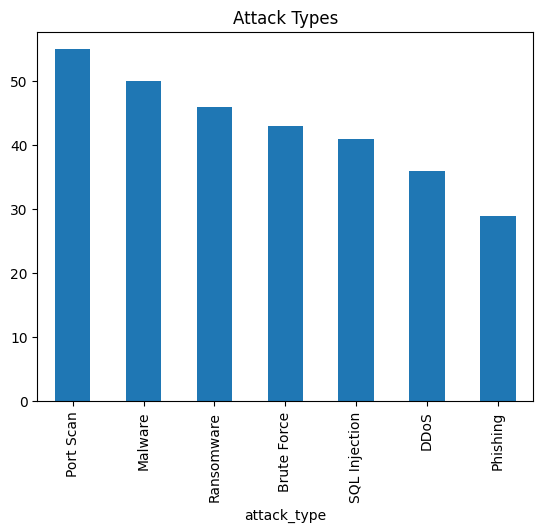

In [28]:
df['attack_type'].value_counts().plot(kind='bar', title='Attack Types')
plt.show()


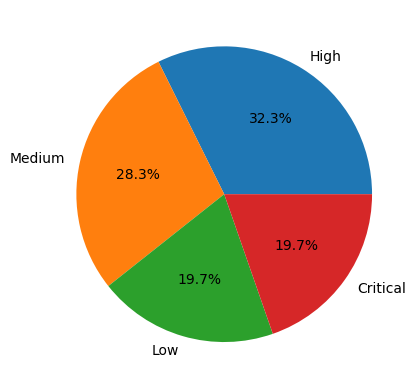

In [29]:
df['severity_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()
